In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [44]:
final_yelp = pd.read_csv('./Final__Generated_Yelp_API_Sentiment_Analysis.csv')
crime_data = pd.read_csv('./Final_Generated_Crime_Austin_2014_to_2016.csv')


final_yelp['First_Review_Sentence_Count'].value_counts()

     1246
Name: First_Review_Sentence_Count, dtype: int64

In [46]:
crime_df = crime_data.groupby('Zip').agg({'GO Highest Offense Desc':'count'})
crime_df = crime_df.reset_index()

price_df = final_yelp.groupby('Zip').agg({'Price Value':'mean'})
price_df = price_df.reset_index()

sentiment_df = final_yelp.groupby('Zip').agg({'First_Review_Sentiment metric_Compound':'mean','Second_Review_Sentiment metric_Compound':'mean','Third_Review_Sentiment metric_Compound':'mean'})
sentiment_df = sentiment_df.reset_index()

crime_price_df = crime_df.merge(price_df,on='Zip',how='outer')
final_df = crime_price_df.merge(sentiment_df,on='Zip',how='outer')
final_df.head()

,Zip,GO Highest Offense Desc,Price Value,First_Review_Sentiment metric_Compound,Second_Review_Sentiment metric_Compound,Third_Review_Sentiment metric_Compound
0,78610,2,1.333333,0.660240,0.645360,0.780060
1,78613,1049,1.739130,0.625928,0.540957,0.524517
2,78617,771,1.200000,0.473389,0.385533,0.674789
3,78652,31,2.000000,0.880975,-0.363900,0.379600
4,78653,83,1.555556,0.436433,0.620650,0.273983


In [56]:
final_df.dropna().sum()

Zip                                        3.621132e+06
GO Highest Offense Desc                    1.082580e+05
Price Value                                7.465199e+01
First_Review_Sentiment metric_Compound     2.329455e+01
Second_Review_Sentiment metric_Compound    2.164381e+01
Third_Review_Sentiment metric_Compound     2.399246e+01
dtype: float64

KeyError: 'Zip'

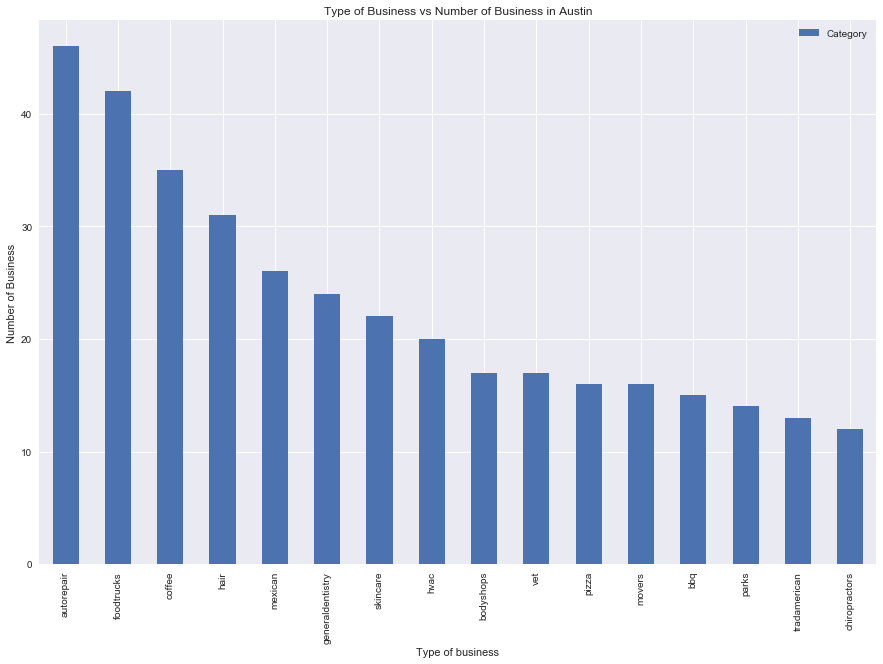

In [8]:
category_df = pd.DataFrame(final_yelp['Category'].value_counts()).reset_index()
category_df = category_df.loc[0:15,:]
category_df.head(50)

category_df.plot('index','Category',kind='bar',figsize = (15,10))
plt.xlabel('Type of business')
plt.ylabel('Number of Business')
plt.title('Type of Business vs Number of Business in Austin')

In [31]:
final_yelp.dropna(inplace=True)



(4, 5)

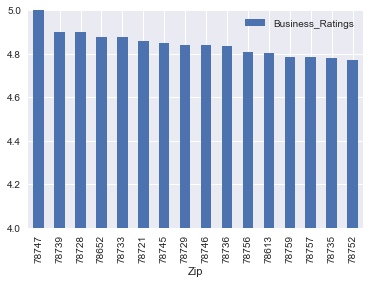

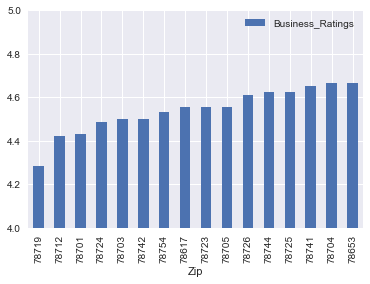

In [92]:
final_yelp.shape
final_yelp_2 = final_yelp.groupby('Zip').Business_Ratings.mean()
final_yelp_2_high = pd.DataFrame(final_yelp_2.sort_values(ascending=False)).reset_index()

final_yelp_2_high.loc[0:15,:].plot('Zip','Business_Ratings',kind='bar')
plt.ylim([4,5])


final_yelp_3_high = pd.DataFrame(final_yelp_2.sort_values(ascending=True)).reset_index()

final_yelp_3_high.loc[0:15,:].plot('Zip','Business_Ratings',kind='bar')
plt.ylim([4,5])

In [110]:
 = pd.DataFrame(crime_data['Highest NIBRS/UCR Offense Description'].value_counts())




Theft: All Other Larceny                        13539
Theft: BOV                                      10545
Burglary / \nBreaking & Entering                 5670
Theft: Shoplifting                               4284
Auto Theft                                       2188
Aggravated Assault                               1888
Robbery                                           874
Rape                                              561
Theft: Pocket Picking                             448
Theft: Auto Parts                                 231
Theft: from Building                              221
Theft: Coin Op Machine                            153
Homicide: Murder & Nonnegligent Manslaughter       32
Theft: Purse Snatching                              7
Name: Highest NIBRS/UCR Offense Description, dtype: int64

In [106]:
crime_data['Category'].value_counts()

Theft: All Other Larceny                        13539
Theft: BOV                                      10545
Burglary / \nBreaking & Entering                 5670
Theft: Shoplifting                               4284
Auto Theft                                       2188
Aggravated Assault                               1888
Robbery                                           874
Rape                                              561
Theft: Pocket Picking                             448
Theft: Auto Parts                                 231
Theft: from Building                              221
Theft: Coin Op Machine                            153
Homicide: Murder & Nonnegligent Manslaughter       32
Theft: Purse Snatching                              7
Name: Category, dtype: int64

In [54]:
test = final_yelp['Category'].value_counts()
test



autorepair                         45
foodtrucks                         41
coffee                             35
hair                               30
mexican                            27
generaldentistry                   24
skincare                           22
hvac                               20
bodyshops                          17
vet                                17
movers                             16
pizza                              16
bbq                                15
parks                              14
tradamerican                       13
chiropractors                      12
pest_control                       11
optometrists                       10
plumbing                           10
pet_sitting                        10
cosmeticdentists                   10
icecream                            9
realestateagents                    9
newamerican                         9
treeservices                        9
homeappliancerepair                 9
realestatesv

In [37]:
test_1

,Category
autorepair,45
foodtrucks,41
coffee,35
hair,30
mexican,27
generaldentistry,24
skincare,22
hvac,20
bodyshops,17
vet,17
